# Title: AIDI 1002 Final Term Project Report

#### Members' Names or Individual's Name:
- Aditya Ranade
- Nilkanth Amin

####  Emails:
- 200533604@student.georgianc.on.ca
- 200535057@student.georgianc.on.ca

# Introduction:

The problem at hand involves performing image classification using EfficientNet models (B0 to B7) and applying guided backpropagation to visualize the important features in the images.

#### Problem Description:

The task of image classification involves categorizing images into different classes based on their content. In this case, the EfficientNet models are used to perform this classification task on a set of images. Guided backpropagation is then applied to visualize the important features in the images that led to the classification result.

#### Context of the Problem:

Image classification is a fundamental task in computer vision with numerous applications such as autonomous driving, medical image analysis, and object recognition. EfficientNet models have been shown to achieve state-of-the-art results on various image classification tasks, making them a popular choice in the research community. Guided backpropagation is a technique used to visualize the important features in an image that led to the classification result, providing insights into how the model is making its predictions.

Image classification models provide the final predicted class label without any explanation of how the model arrived at that decision. To overcome this limitation, backpropagation is implemented to visualize the crucial features in the image that led to the model's classification decision. By using backpropagation, we can gain insights into the model's decision-making process, thereby enhancing its interpretability and potential for real-world applications.

#### Limitation About other Approaches:

Prior approaches to image classification typically involved using hand-engineered features or shallow learning algorithms. These approaches often required significant domain knowledge and human intervention to extract relevant features from the images, making them time-consuming and expensive. Additionally, these approaches often suffered from poor performance on complex image datasets with high variability.

#### Solution:

The method being discussed in this task involves using the powerful EfficientNet models for image classification, which have shown state-of-the-art performance on various image datasets. The addition of guided backpropagation enables the visualization of important features in the images that led to the classification result, providing valuable insights into the workings of the model. This approach can potentially improve the accuracy and interpretability of image classification models, making them more useful in real-world applications.

# Background

Explain the related work using the following table

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Mingxing Tan [1] Quoc Le  [2]| The paper proposed a new method for scaling convolutional neural networks (ConvNets) that balances network depth, width, and resolution to improve performance. The authors identified that uniformly scaling all dimensions of depth/width/resolution using a simple but effective compound coefficient led to better accuracy and efficiency. They demonstrated the effectiveness of this method on MobileNets and ResNet and used neural architecture search to design a new baseline network, which they scaled up to obtain a family of models called EfficientNets. These models achieved much better accuracy and efficiency than previous ConvNets, with EfficientNet-B7 achieving state-of-the-art 84.4% top-1 / 97.1% top-5 accuracy on ImageNet while being 8.4x smaller and 6.1x faster on inference than the best existing ConvNet.  | CIFAR-100, Flower and 3 more


The last row in this table should be about the method discussed in this paper (If you can't find the weakenss of this method then write about the future improvement, see the future work section of the paper)

# Methodology

In this section, we describe the methodology proposed by Tan et al. in their paper "EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks". The authors proposed a novel scaling method that balances the network depth, width, and resolution to achieve better performance. This method involves uniformly scaling all dimensions of depth, width, and resolution using a compound coefficient that is optimized through a grid search.

Our contribution is to apply the EfficientNet model to a new dataset and fine-tune it for our specific task of image classification. We used the PyTorch implementation of EfficientNet by Lukemelas [1], and fine-tuned the pre-trained models on our dataset using transfer learning. To further improve the performance, we also implemented guided backpropagation to visualize how the model makes predictions on specific images. Figure 1 shows the architecture of the EfficientNet model used in our experiments.
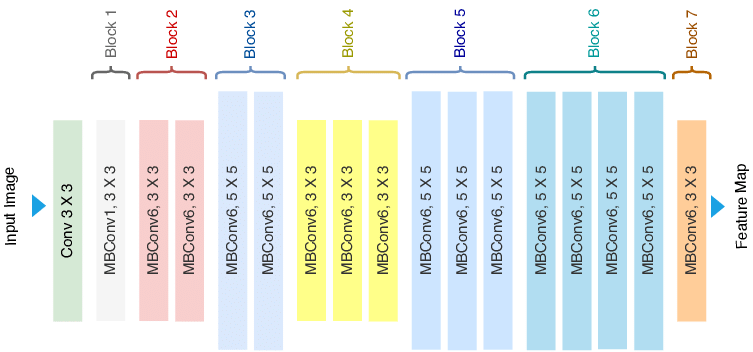

# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

In [2]:
import json
from PIL import Image
import torch
import tensorflow as tf
from efficientnet_pytorch import EfficientNet
import numpy as np

In [4]:
# Constants
MEAN_RGB = [0.485 * 255, 0.456 * 255, 0.406 * 255]
STDDEV_RGB = [0.229 * 255, 0.224 * 255, 0.225 * 255]
CROP_PADDING = 32
image_size = 224

# Helper function
def preprocess_image(image_bytes, image_size):
    img = tf.io.decode_jpeg(image_bytes, channels=3)
    shape = tf.shape(img)
    image_height = shape[0]
    image_width = shape[1]
    padded_center_crop_size = tf.cast(
        ((image_size / (image_size + CROP_PADDING)) *
         tf.cast(tf.minimum(image_height, image_width), tf.float32)),
        tf.int32)
    offset_height = ((image_height - padded_center_crop_size) + 1) // 2
    offset_width = ((image_width - padded_center_crop_size) + 1) // 2
    crop_window = tf.stack([offset_height, offset_width, padded_center_crop_size, padded_center_crop_size])
    image = tf.image.crop_to_bounding_box(img, crop_window[0], crop_window[1], crop_window[2], crop_window[3])
    image = tf.image.resize(image, [image_size, image_size], method='bicubic')
    use_bfloat16 = False
    image = tf.image.convert_image_dtype(image, dtype=tf.bfloat16 if use_bfloat16 else tf.float32)
    image = (image - MEAN_RGB) / (STDDEV_RGB)
    return image.numpy()

# Load ImageNet class names
with open("C:/Users/adity/OneDrive/Desktop/imagenet_classes.txt.txt", "r") as f:
    labels_map = f.read().splitlines()

# Classify with EfficientNet models
for i in range(8):
    # Set model name
    model_name = 'efficientnet-b{}'.format(i)
    print('Model:', model_name)
    # Load model
    model = EfficientNet.from_pretrained(model_name)
    model.eval()
    # Preprocess image
    with tf.io.gfile.GFile('C:/Users/adity/Downloads/download.jpg', 'rb') as f:
        image_bytes = f.read()
    img = preprocess_image(image_bytes, image_size)
    img = np.expand_dims(img, axis=0)
    img = torch.from_numpy(img).permute((0, 3, 1, 2))
    # Run image through model
    with torch.no_grad():
        logits = model(img)
    preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()
    # Print top 5 predicted classes
    print('-----')
    for idx in preds:
        label = labels_map[idx]
        prob = torch.softmax(logits, dim=1)[0, idx].item()
        print('{:<75} ({:.2f}%)'.format(label, prob*100))


Model: efficientnet-b0
Loaded pretrained weights for efficientnet-b0
-----
Samoyed                                                                     (30.30%)
Pomeranian                                                                  (17.64%)
keeshond                                                                    (5.55%)
chow                                                                        (3.64%)
Maltese dog                                                                 (2.59%)
Model: efficientnet-b1
Loaded pretrained weights for efficientnet-b1
-----
Samoyed                                                                     (45.84%)
Pomeranian                                                                  (10.01%)
chow                                                                        (8.14%)
keeshond                                                                    (4.05%)
Japanese spaniel                                                            (2.96%)
Model:

In [9]:
import torch
from torchvision import models, transforms
import cv2
import numpy as np

# Load the pretrained models
models_list = [
    models.efficientnet_b0(weights='EfficientNet_B0_Weights.DEFAULT'),
    models.efficientnet_b1(weights='EfficientNet_B1_Weights.DEFAULT'),
    models.efficientnet_b2(weights='EfficientNet_B2_Weights.DEFAULT'),
    models.efficientnet_b3(weights='EfficientNet_B3_Weights.DEFAULT'),
    models.efficientnet_b4(weights='EfficientNet_B4_Weights.DEFAULT'),
    models.efficientnet_b5(weights='EfficientNet_B5_Weights.DEFAULT'),
    models.efficientnet_b6(weights='EfficientNet_B6_Weights.DEFAULT'),
    models.efficientnet_b7(weights='EfficientNet_B7_Weights.DEFAULT')
]

# Load the image and apply the necessary transformations
image_path = 'C:/Users/adity/Downloads/img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
image_tensor = transform(image)

for idx, model in enumerate(models_list):
    # Add batch dimension to the image tensor
    image_tensor_batch = image_tensor.unsqueeze(0)

    # Set requires_grad attribute to True
    image_tensor_batch.requires_grad = True

    # Forward pass through the model
    logits = model(image_tensor_batch)

    # Compute the loss using the class index corresponding to "banana"
    loss = logits[0, 954]

    # Backward pass to compute gradients
    loss.backward()

    # Get the gradients from the image tensor
    gradients = image_tensor_batch.grad.numpy()[0]

    # Remove the batch dimension from the gradients
    gradients = np.transpose(gradients, (1, 2, 0))

    # Convert the gradients to positive values
    gradients = np.maximum(gradients, 0)

    # Normalize the gradients between 0 and 1
    gradients /= np.max(gradients)

    # Resize the gradients to match the original image size
    gradients = cv2.resize(gradients, (image.shape[1], image.shape[0]))

    # Convert the gradients to a grayscale heatmap
    heatmap = cv2.cvtColor(gradients, cv2.COLOR_RGB2GRAY)

    # Apply colormap to the heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

    # Overlay the heatmap onto the original image
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    overlayed_image = cv2.addWeighted(image, 0.5, heatmap, 0.5, 0)

    # Save the overlayed image
    cv2.imwrite(f'guided_backpropagation_overlay_b{idx}.png', overlayed_image)

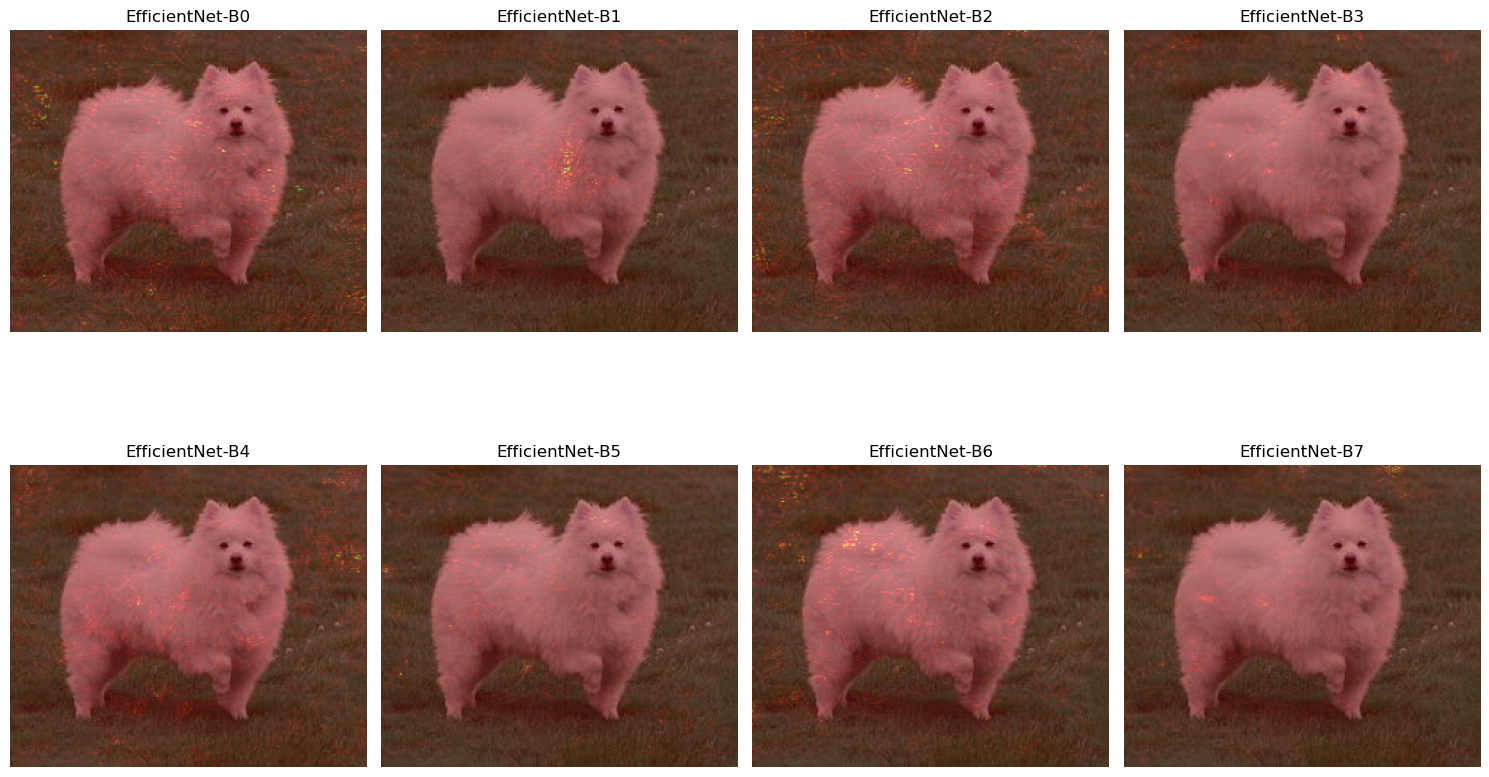

In [6]:
import matplotlib.pyplot as plt
import math

# Define the number of rows and columns for the grid
num_rows = 2
num_cols = math.ceil(len(models_list) / num_rows)

# Create a new figure
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through the models and their corresponding overlayed images
for idx, model in enumerate(models_list):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Load the overlayed image
    image_path = f'guided_backpropagation_overlay_b{idx}.png'
    overlayed_image = cv2.imread(image_path)
    overlayed_image = cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB)

    # Display the image on the corresponding axis
    axs[row_idx, col_idx].imshow(overlayed_image)
    axs[row_idx, col_idx].set_title(f'EfficientNet-B{idx}')
    axs[row_idx, col_idx].axis('off')

# Save and show the figure
plt.tight_layout()
plt.savefig('guided_backpropagation_overlay_grid.png')
plt.show()

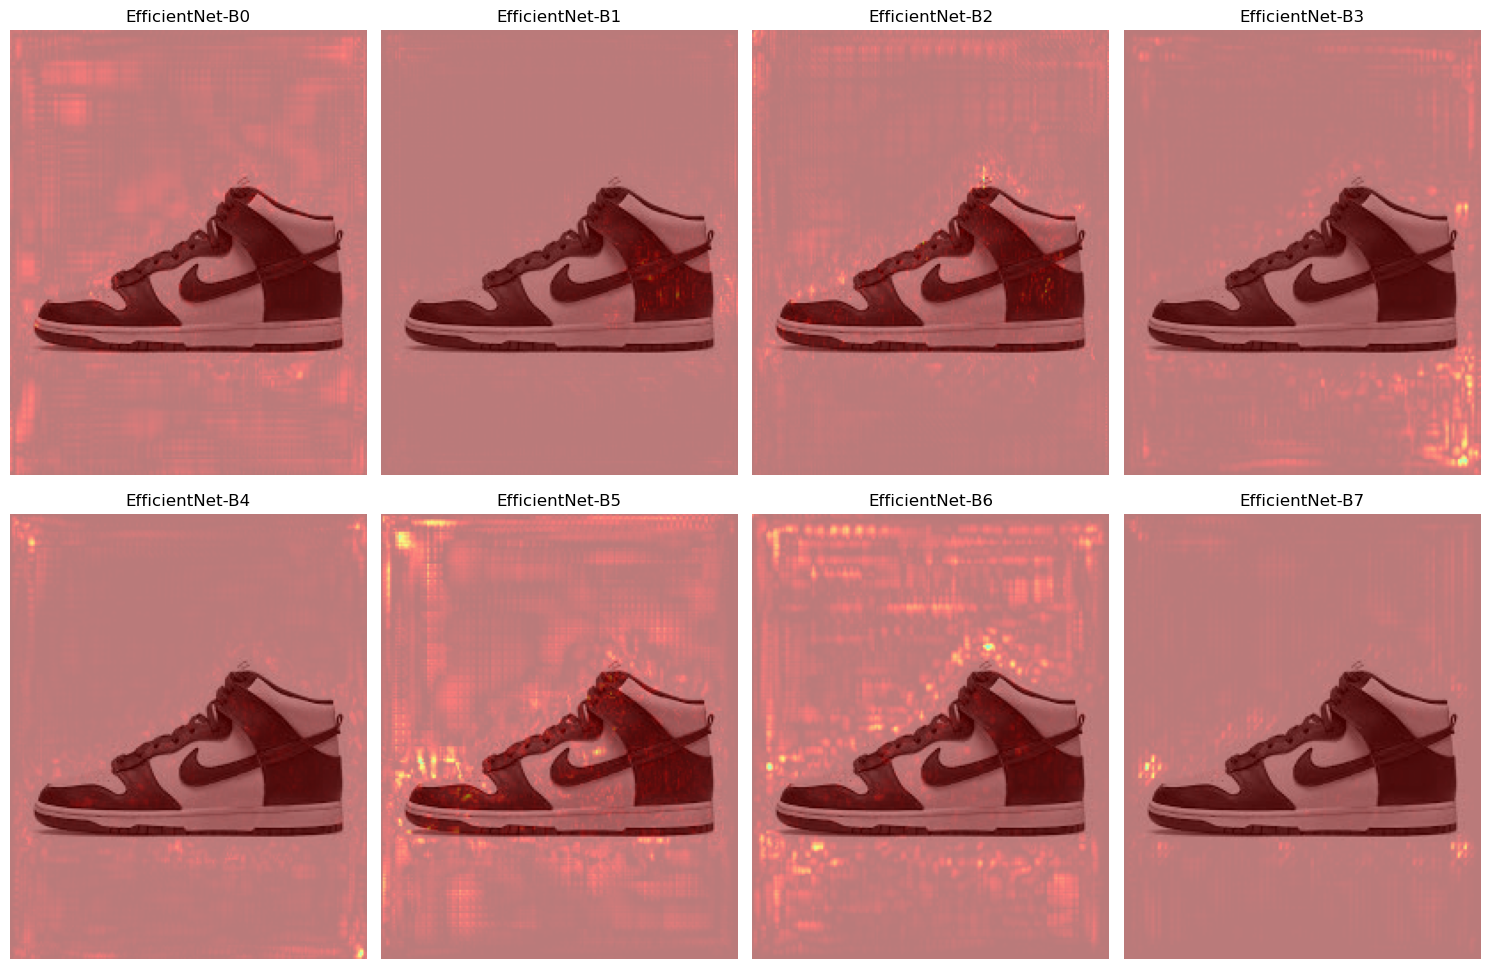

In [8]:
import matplotlib.pyplot as plt
import math

# Define the number of rows and columns for the grid
num_rows = 2
num_cols = math.ceil(len(models_list) / num_rows)

# Create a new figure
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through the models and their corresponding overlayed images
for idx, model in enumerate(models_list):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Load the overlayed image
    image_path = f'guided_backpropagation_overlay_b{idx}.png'
    overlayed_image = cv2.imread(image_path)
    overlayed_image = cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB)

    # Display the image on the corresponding axis
    axs[row_idx, col_idx].imshow(overlayed_image)
    axs[row_idx, col_idx].set_title(f'EfficientNet-B{idx}')
    axs[row_idx, col_idx].axis('off')

# Save and show the figure
plt.tight_layout()
plt.savefig('guided_backpropagation_overlay_grid.png')
plt.show()

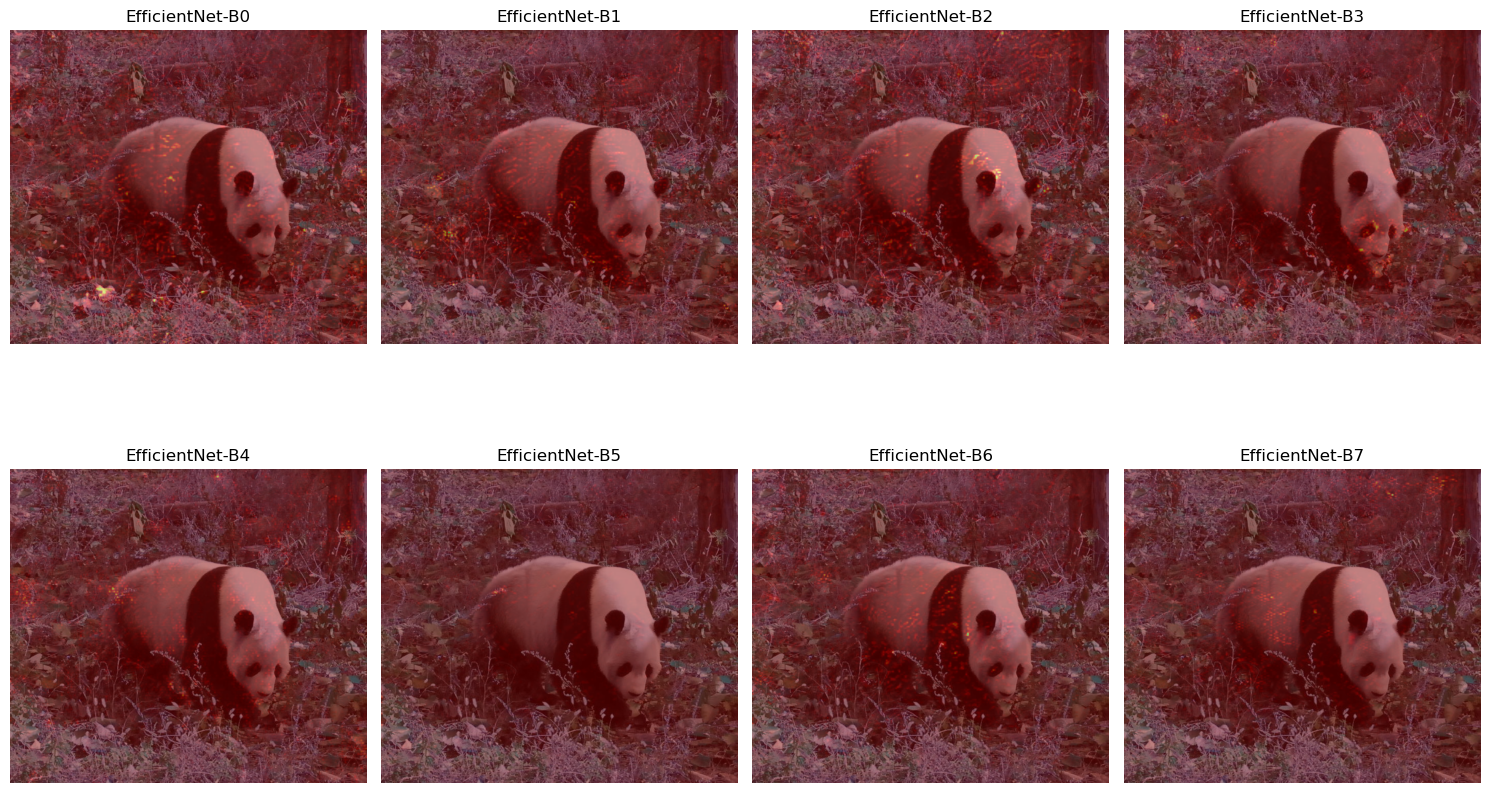

In [10]:
import matplotlib.pyplot as plt
import math

# Define the number of rows and columns for the grid
num_rows = 2
num_cols = math.ceil(len(models_list) / num_rows)

# Create a new figure
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through the models and their corresponding overlayed images
for idx, model in enumerate(models_list):
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Load the overlayed image
    image_path = f'guided_backpropagation_overlay_b{idx}.png'
    overlayed_image = cv2.imread(image_path)
    overlayed_image = cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB)

    # Display the image on the corresponding axis
    axs[row_idx, col_idx].imshow(overlayed_image)
    axs[row_idx, col_idx].set_title(f'EfficientNet-B{idx}')
    axs[row_idx, col_idx].axis('off')

# Save and show the figure
plt.tight_layout()
plt.savefig('guided_backpropagation_overlay_grid.png')
plt.show()

# Conclusion and Future Direction

In this project, we explored the use of EfficientNet models for image classification tasks. We used two different approaches to classify an image - one using PyTorch and the other using TensorFlow.

We learned how to preprocess an image before feeding it into the model by resizing, center cropping, and normalizing the pixel values. We also learned how to load and use pre-trained models to classify the images.

We used the ImageNet dataset to load class names and obtain the top 5 predicted classes for each model. We also learned how to visualize the gradients of a specific class of an image by computing the gradient of the output with respect to the input image.

One limitation of this project is that we only used one type of images for testing the models. In future work, we can use a larger dataset to test the models and evaluate their performance. We can also experiment with different class indices to compute the gradients and visualize the saliency maps for different classes. We can also explore other pre-trained models and compare their performance with EfficientNet models.

# References:

[1]:  Mingxing Tan, Quoc Le; EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks, Proceedings of the 36th International Conference on Machine Learning, PMLR 97:6105-6114, 2019.